# Codealong:  APIs with Python
> GSA Data Practitioner Summit Codealong, October 2018

# Reminders! 
>This session was designed to be interactive and (hopefully) fun!<br><br>
>If you plan to code along, all you'll need to do is zoom-chat me your solution!

# Learning Objectives

* Understand the **Hypertext Transfer Protocol (HTTP)**
* Define **Application Programming Interface (API)** 
* Introduce Python's workhorse API library, `requests`
* Differentiate **XML** and **JSON**
* Learn how to parse **JSON** using Python
* Think like a computer (this can be a good thing!)
* Oh, and learn a lot of useless information about **Star Wars**

# 1. The Hypertext Transfer Protocol (HTTP)
**HTTP** is the foundation of data communication for the World Wide Web. The Star Wars API that we'll soon use relies on it.

### 1.1 The Internet
The Internet is a large network of interconnected networks. A suite of protocols, commonly known as [TCP/IP](https://en.wikipedia.org/wiki/Internet_protocol_suite), governs the flow of information within this network of networks.  

<img src="https://www.washingtonpost.com/blogs/worldviews/files/2014/01/jAlw8ap-1.gif" width = 400 height = 400>

But where does all of the information on the Internet come from?

### 1.2 Remote Servers
Every *bit* of information on the Internet is stored somewhere on one or many **remote servers**. A remote server sounds technical, but it’s just a distant computer that is optimized to process *requests for information*.

<img src="https://steemitimages.com/0x0/https://steemitimages.com/DQmbup5Cp465SLErBWo7jSTiYja5oPo7nxRQo3YT2T9D6m6/Cloud.gif" width = 400 height = 400>

But how does a remote server know how to handle a request for information?

### 1.3 HTTP
The **Hypertext Transfer Protocol (HTTP)** is the set of rules that enables remote servers to process requests for information.

More specifically, HTTP governs **requests** for information and **responses** of information within a **client–server computing model**. 

<img src="https://raw.github.com/site2site/site2site.github.io/master/images/lectures/client-server-model/client-server-2.gif" width = 400 height = 400>

In this model, the client submits an HTTP request message to the server. The server, which might provide resources such as images and text, then returns an HTTP response message to the client.

### 1.4 An Everyday Example
>When you type `www.google.com` into your browser, you - the client - are sending an HTTP request to Google's remote server. That server accepts your request and then sends back an HTTP response. 

>To you, the response is the google homepage:
>
><img src="https://www.google.com/intl/en_us/homepage/images/hero-dhp-chrome-mac.jpg?mmfb=9f871c66de344d37d2dd5a8c74d03a1b" width = 300 height = 300>
>

>But to your browser, which is the the client, a part of the response actually looks something like this:
>
><img src="https://www.computerhope.com/issues/pictures/view-source.jpg" width = 300 height = 300>
>

# 2. So What Does This Have to Do with APIs?
**Application Programming Interfaces (APIs)** are sets of requirements that govern how one application can communicate and interact with another. Every time you visit a page on the Web, you're interacting with some remote server’s API.

In the `google.com` example, Google's server is functioning, in part, as an API. 

When you request `www.google.com`, Google's server receives that url and knows that you want the homepage. 

But if you request `maps.google.com/`, Google's server determines that you want Google Maps instead. 

But APIs can serve up more than just webpages and maps. They can also serve up data!

### 2.1 APIs for Data 
APIs come in many flavors, but as data scientists what we're really interested in those that can connect us to a data source. These sorts of APIs allow us to request and retrieve data from remote servers **so long as we adhere to the API's rules**.

Today, we'll use Python to access an **open API**:  the [Star Wars API](https://swapi.co/). 

>An **open API** is a publicly available application programming interface that provides developers with programmatic access to a proprietary software application or web service.

### 2.2 Why Use an API?
Computer software is increasingly becoming the *de facto* medium of business. This means that people who have never had any formal education in computer science need to have at least some software literacy. From sales analysts to HR representatives, we are all being asked to make “data driven” decisions. 

But you can't make a data driven decision without data. And, Uufortunately, our data is far too often locked up in uncommunicative databases that have horrendous user interfaces and sluggish functionality. 

People build APIs as an attempt to free that data and make it more accessible to those that need it.

More specifically, APIs are useful when:

 - **The data changes quickly** 
     - E.g. asset-level IoT sensor data
 - **You only want a slice of the data**
     - E.g. transactional data, such as a single entity update in SAM.gov from a particular day
 - **You need to repeat computations** 
     - E.g. monitoring solicitation and award numbers in FedBiz Opps on a routine basis
 - **You want to automate a process that involves a variety of data sources**
     - E.g. Programs communicate via APIs

Finally, there might be situations where some or all of those use-cases coincide. It's in those situations that an API becomes very useful!

## 3. API Data Formats:  XML and JSON
API's deliver their data in a variety of formats. Two common formats are **XML** and **JSON**.

### 3.1 Extendable Markup Language (XML)

>  - XML is a markup language that encodes documents in a format that is both human-readable and machine-readable.
 - Although XML is an older than JSON, it still pervades systems today. If you need to use an API that’s been around for over ten years, the likelihood that you’ll need to work with XML is high.

### 3.2 JavaScript Object Notation (JSON)
>  - JSON is an open-standard file format that uses human-readable text to transmit data objects consisting of attribute–value pairs and array data types (or any other serializable values).
 - JSON is the format of choice for transmitting data across platforms. Although both JSON and XML are platform independent, JSON is considerably more plain-language. This makes JSON easier for humans to read and parse.

### 3.3 A Visual Comparison of XML and JSON
<img src="https://www.sunnyhoi.com/app/uploads/2017/09/json-vs-xml-which-format-to-use-for-your-api.png" height = 450 width = 450>

### 3.4 Takeaways
 - JSON is easier to read/parse and increasingly more common
 - XML can be tougher to parse, but is found in many legacy systems

# 4. JSON and Python Dictionaries
JSON bears a close resemblance to Python's built in `dictionary` type.

> A `dictionary` is a unordered mapping of unique **keys** to **values**.

Here's an example of a simple Python dictionary:

In [1]:
d = {'key_1' : 'value_1',
     'key_2' : 'value_2'}

>Above, we used an equal sign (`=`) to create the object `d`. We used two curly brackets `{}` to enclose two *key:value* pairs. Each *key:value* pair is conjoined with a colon (`:`). Both the values and the keys are strings, defined using single quotes `''`, which is how we tell Python that we're typing characters. 

Now that we have a dictionary object (`d`), we do things with it, like lookup the value of a particular key. To do this, we use the bracket `[]` indexing noation:

In [2]:
#get the value assigned to the string 'key_1'
d['key_1']

'value_1'

Above, we returned the value assigned to `'key_1'`, which is `'value_1'`. 

### 4.1 Your Turn!
>#1 - Lookup the value that maps to `'key_2'`.

In [3]:
# You:  Code here
d['key_2']

'value_2'

### 4.2 Nested Dictionaries

In Python, just about anything can be a value within a dictionary - even another dictionary!  When you have a dictionary within a dictionary, you have what's called a **nested dictionary**. For example:

In [5]:
nested_dict = { 
                'dict1': {'key_1': 'value_1'},
                'dict2': {'key_2': 'value_2'}
                }

Above, `nested_dict` is a nested dictionary. There are two internal dictionaries assigned to the keys `'dict1'` and `'dict2'`. Both of those dictionaries have a single key that maps to a single value. 

To access the elements of a nested dictionary, we use the same indexing `[]` syntax.

In [6]:
# access the dictionary value that belongs to the key 'dict1'. This will return a dictionary.
nested_dict['dict1']

{'key_1': 'value_1'}

In [7]:
# access the value that belongs to 'key_1' within the nested dictionary. This will return a string.
nested_dict['dict1']['key_1']

'value_1'

Now that you've got a feel for nested dictionaries, let's consider a slightly more complex nested dictionary that has dictionaries, strings, lists, integers and floats as values. 

In [9]:
simpsons = {'season_one' : {'num_episodes':23, 
                            'avg_rating':92.7,
                            'awards':["Good Writing award"],
                            'fan_favorite':'cartoon dog'},
            
            'season_two' : {'num_episodes':15, 
                            'avg_rating':88.4,
                            'awards': ["Cowabunga of the Year", "Better Homes and Gardens People's Choice"],
                            'fan_favorite':'Skateboard Kid'},
            
            'season_three' : {'num_episodes':25, 
                              'avg_rating':90.4,
                              'awards':[],
                              'fan_favorite':"Marge's Hair"},
            
            'season_four' : {'num_episodes':18, 
                             'avg_rating':95,
                             'awards':["Good Job Award", "Funny Show of the Month (February)"],
                             'fan_favorite':"Homer"}}

The nested dictionary - `simpsons` - contains four keys: 
 - `'season_one'`
 - `'season_two'`
 - `'season_three'`
 - `'season_four'`
 
We can get the keys of a dictionary using the `keys()` method of a dictionary object:

In [10]:
# the simpsons object's 4 keys
simpsons.keys()

dict_keys(['season_one', 'season_two', 'season_three', 'season_four'])

Each of these keys maps to a value. Since `simpsons` is a nested dictionary, each key maps to yet another dictionary. Take the value belonging to `'season_one'`. That dictionary contains the following keys:
 - `'num_episodes'`
 - `'avg_rating'`
 - `'awards'`
 - `'fan_favorite'`

In [11]:
# the keys belonging to the dictionary that maps to `season_one`
simpsons['season_one'].keys()

dict_keys(['num_episodes', 'avg_rating', 'awards', 'fan_favorite'])

Those keys then map to a variety of value types such as `str`, `int`, `float`, and `list`. They can be accessed using the same indexing notation `[]`.

In [12]:
# get the avg_rating of season one, which is a float (i.e. decimal) value
simpsons['season_one']['avg_rating']

92.7

### 4.3 Your Turn!
Before we actually use an API and start parsing some JSON, we're going to warm up with the nested dictionary `simpsons`. Try to answer the following questions:

>#1 - How many episodes are in the fourth season?

In [0]:
# You:  Code here


>#2 - How many episodes did the show air over its first four seasons?

In [0]:
# You:  Code here


# 5. Let's make an API Request!
Now that we're warmed up, we'll use Python's `requests` module to request data from the [The Star Wars API](https://swapi.co/). We'll then use what we know about Python dictionaries to access and parse that response.

We're going to learn totally useless information about Star Wars!

<img src="https://media.giphy.com/media/xT9DPmbSh7Y1uOh7nW/giphy.gif" >

But first, we need to know a little bit more about what goes into an API **request**.

## 5.1 Anatomy of an API Request (typically)
**Requests** are made using the Hypertext Transfer Protocol (HTTP). To make a valid request, the client (that means you!) needs to include four things:
 - **URL (Uniform Resource Locator)**
     - This is how we (the client) tell the server which resources we want to interact with
     - The URL is commonly comprised of three parts:
         1. <font color='green'>Host</font>
         2. <font color='blue'>Resource Path</font>
         3. <font color='red'>Query (sometimes optional)</font>
         <br><br><font color='green' size=24><span>http</span>s://swapi.co/api</font><font color='blue' size=24>/people</font><font color='red' size=24>/?search=r2</font>
    
         
 - **Method**
    - The method tells the server what kind of action we (the client) want to perform. Our request will be a **GET**, which asks the server to retrieve a resource.
 - **Headers**
    - Headers provide meta-data about a request. You might use headers for authentication purposes or to specify the data format you want. The `requests` library supplies your requests with some default headers, but you can add custom headers if you want.
 - **Body**
    - GET requests don't (or rather shouldn't) have meaningful bodies (cf [this](https://stackoverflow.com/questions/22034144/what-does-it-mean-http-request-body) and [this](https://stackoverflow.com/questions/978061/http-get-with-request-body)), so we'll ignore this for now.

Although it's usually a good idea to read an API's [documentation](https://swapi.co/documentation#base) before blindly making requests, you can rest assured that I did that for you. So let's get started!

### 5.2 Define the URL
We won't use a query for our first request. Instead, we'll request all of the data for the first Star Wars movie:  A New Hope.

In [13]:
#define the host
host = "https://swapi.co/api"
#define the resource path (ignoring a query for now)
resource_path = "/films/1"
#concatenate the host and resource path
url = host + resource_path
#print our url to spot check
print(f"Here's the url we'll use for our first request:\n{url}\nTry visiting it in your browser now!")

Here's the url we'll use for our first request:
https://swapi.co/api/films/1
Try visiting it in your browser now!


>If we vist that link, we'll get a sneak preview of what we'll soon be requesting with Python. 

### 5.3 Make the GET Request
For our request, we'll use the `get()` method from `requests` to specify that our request is a GET. 
We'll also let `requests` use the default headers. 
So all we need to pass to `requests.get()` is the url that we defined above.

Let's do that now!

In [14]:
import requests #this is how you gain access to the requests library

r = requests.get(url) #here, we'll assign the results of our request to an object named `r`

/anaconda/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


So that was easy. But what's `r`?

In [15]:
type(r)

requests.models.Response

`r` contains our response. It's a special type specific to the `requests` library. Before we dive into that object, let's acquaint ourselves with the anatomy of a response.

## 5.4 Anatomy of an API Response
A **Response** consists of:
 - A **Status Code**
     - Status codes are issued by a server in response to a client's request made to the server. They tell you if your request was successful and, if not, a little about why not. 
 - **Headers**
     - Meta-data about the response. For example, the Content-Type header tells you the format of your response's data.
 - A **Body** of structured data
     - The most commonly used structure for this data is JSON (Javascript Object Notation)

#### 5.4.1 Status codes
Status codes are returned with every request that is made to a web server. You're probably already familiar with one but just don't know it. Does this look familiar?

<img src="https://i.stack.imgur.com/WOlr3.png" width=500 height=500>

A **404** is a type of status code.

Here are some other status codes that are relevant to GET requests:
 - 301 - the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
 - 400 - the server thinks you made a bad request. This can happen when you don't send along the right data, among other things.
 - 401 - the server thinks you're not authenticated. This happens when you don't send the right credentials to access an API (we'll talk about authentication in a later post).
 - 403 - the resource you're trying to access is forbidden:you don't have the right permissions to see it.
 - 404 - the resource you tried to access wasn't found on the server.
 - **200** - the request has succeeded, although the information returned with the response is dependent on the method used in the request.

In [16]:
#check our status code
r.status_code

200

#### 5.4.2 Headers
Response headers depend on the status code. Since we got a 200 response, we can check the headers to verify that our response's data was delivered as JSON. 

In [17]:
# check the response headers. Notice how the return value is a dictionary!
r.headers

{'Date': 'Tue, 23 Oct 2018 14:51:14 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept, Cookie', 'X-Frame-Options': 'SAMEORIGIN', 'Etag': 'W/"efcda1cd8821a886c81de0c6de9dd6f1"', 'Allow': 'GET, HEAD, OPTIONS', 'Via': '1.1 vegur', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '46e50547ffc39f78-IAD', 'Content-Encoding': 'gzip'}

Since the response headers are a dictionary, we can access a specifc key, like `'Content-Type'`:

In [18]:
r.headers['Content-Type']

'application/json'

#### 5.4.3 Body
Alright! So far we've
 - made a request
 - received a valid (200) response
 - verified in the headers that the `'Content-Type'` is `'application/json'`
 
This is great!

But how do we access and parse that JSON data in the response's body?

<img src="https://media.giphy.com/media/MWBCREitBJc8o/giphy.gif" width = 300 height = 300>

In [19]:
# will this work??
r.body

AttributeError: 'Response' object has no attribute 'body'

In [20]:
# what about this, will it work?
r.body()

AttributeError: 'Response' object has no attribute 'body'

### 5.5 Documentation Break
>At some point, you're going to need to read the documentation.
>So we're going to take a look at the [requests documentation](http://docs.python-requests.org/en/master/api/) to try to figure out how we can get the json data out of our requests object `r`.<br><br>
>I'll structure my search with a few guiding questions:
1. Which method from the `requests` library did we use?
2. What did that method return?
3. What methods or attributes are available to that return type?
4. Does one of those methods or attributes give us what we need (JSON data in our case)?

In [21]:
# access the json in r
r.json()

{'title': 'A New Hope',
 'episode_id': 4,
 'opening_crawl': "It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....",
 'director': 'George Lucas',
 'producer': 'Gary Kurtz, Rick McCallum',
 'release_date': '1977-05-25',
 'characters': ['https://swapi.co/api/people/1/',
  'https://swapi.co/api/people/2/',
  'https://swapi.co/api/people/3/',
  'https://swapi.co/api/people/4/',
  'https://swapi.co/api/people/5/',
  'https://swapi.co/api/people/6/',
  'https://swapi.co/api/people/7/',
  'htt

### 5.6 Your Turn!
<img src="https://media.giphy.com/media/3ornk7TgUdhjhTYgta/giphy.gif" height=300 width = 300>

In [22]:
# You:  we saw how to get the json out of r! Now assign it to a variable named a_new_hope
a_new_hope = r.json()

In [23]:
# You: check the type of a_new_hope
type(a_new_hope)

dict

In [24]:
#  You: what keys exist within a_new_hope? 
a_new_hope.keys()

dict_keys(['title', 'episode_id', 'opening_crawl', 'director', 'producer', 'release_date', 'characters', 'planets', 'starships', 'vehicles', 'species', 'created', 'edited', 'url'])

In [26]:
# You:  Print the opening crawl of the film
a_new_hope['opening_crawl']

"It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy...."

In [27]:
# You:  What characters are in this film?
a_new_hope['characters']

['https://swapi.co/api/people/1/',
 'https://swapi.co/api/people/2/',
 'https://swapi.co/api/people/3/',
 'https://swapi.co/api/people/4/',
 'https://swapi.co/api/people/5/',
 'https://swapi.co/api/people/6/',
 'https://swapi.co/api/people/7/',
 'https://swapi.co/api/people/8/',
 'https://swapi.co/api/people/9/',
 'https://swapi.co/api/people/10/',
 'https://swapi.co/api/people/12/',
 'https://swapi.co/api/people/13/',
 'https://swapi.co/api/people/14/',
 'https://swapi.co/api/people/15/',
 'https://swapi.co/api/people/16/',
 'https://swapi.co/api/people/18/',
 'https://swapi.co/api/people/19/',
 'https://swapi.co/api/people/81/']

It looks like the characters key doesn't contain what we were expecting. Instead of a list of character names, we have a list of urls that seem similar to our original. So let's make another request to examine the json for the first character in that list of urls.

In [0]:
# You:  Make a request for the first character in the list of urls. Get the json and assign it to char_1


In [0]:
# You: What's the name of this character?


# 6. Thinking Like a Computer
A basic building block of all programming is the ability to repeat some code over and over again. In computer science, repetitive code execution is known as **iteration**. 

We'll use a `for` loop to iterate through a `list` of character urls and return some data about them. 

>A **loop** is a sequence of instructions that is continually executed until a certain condition is reached. For us, the condition that we need to reach is that we run out of character urls. Since that's the case, we'll use a `for` loop. 

> A `list` is a Python data type. It is a changeable, ordered sequence of elements.

In [28]:
#create a list of all of the urls
character_urls = a_new_hope['characters']

#instantiate an empty list using the brackets []. We'll append to this list during the for loop
characters = []

#loop through each of the urls in our list of character urls 
for char_url in character_urls:
    #make a get request with the char_url
    char_r = requests.get(char_url)
    
    #get the json from the response
    char_json = char_r.json()
    
    #append the json to the list we instantiate on line 4
    characters.append(char_json)

We now have the JSON response for each character in a `list` object called `characters`. 

Let's access the first (i.e. $0^{th}$) element in that list to be sure it's Luke Skywalker like we discovered above.


In [29]:
#To access the first element in the list of characters, we use the bracket [] notation:
characters[0]

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.co/api/planets/1/',
 'films': ['https://swapi.co/api/films/2/',
  'https://swapi.co/api/films/6/',
  'https://swapi.co/api/films/3/',
  'https://swapi.co/api/films/1/',
  'https://swapi.co/api/films/7/'],
 'species': ['https://swapi.co/api/species/1/'],
 'vehicles': ['https://swapi.co/api/vehicles/14/',
  'https://swapi.co/api/vehicles/30/'],
 'starships': ['https://swapi.co/api/starships/12/',
  'https://swapi.co/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.co/api/people/1/'}

There he is. Alright!

> Now, as a quick (and optional) aside, let's see how we can achive the same outcome as that for loop in one line of code using a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) instead of a `for` loop.

In [0]:
# using a list comprehension
chars = [requests.get(char_url).json() for char_url in r.json()['characters']]

In [0]:
# whats the first element in the list of characters?
chars[0]

### 6.1 Your turn
Now that we have a list of character dictionaries in both `chars` and `characters`, use a `for` loop (or a list comprehension!) on one of them to `print()` the names of each character.

In [0]:
# YOU:  print() all of the characters' names!


## 6.2 Your Turn! (again)
Pick a different film (e.g 'http://swapi.co/api/films/2' or 'http://swapi.co/api/films/3') and figure out the following:

> #1 - The total `mass` of all of the `characters` in the film you chose.

In [0]:
# YOU:  get the total mass of all of the characters in the film you chose


>#2 - The total number of `crew` members that could fit on every `starship` in the film you chose (you can assume that there is only one of each ship in each film).

In [0]:
# YOU:  get the total number of crew members that could fit on every starship in the film you chose


>#3 - The `diameter` of the largest `planet` in the film you chose.

In [0]:
# YOU:  get the diameter of the largest planet in the film you chose.


>#4 - The names of all of the male `characters` in the film you chose.

In [0]:
# YOU:  get the names of all of the male characters in the film you chose.


# 7. Bonus
For fun, here's a scatter plot of each character's height and weight.

/anaconda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


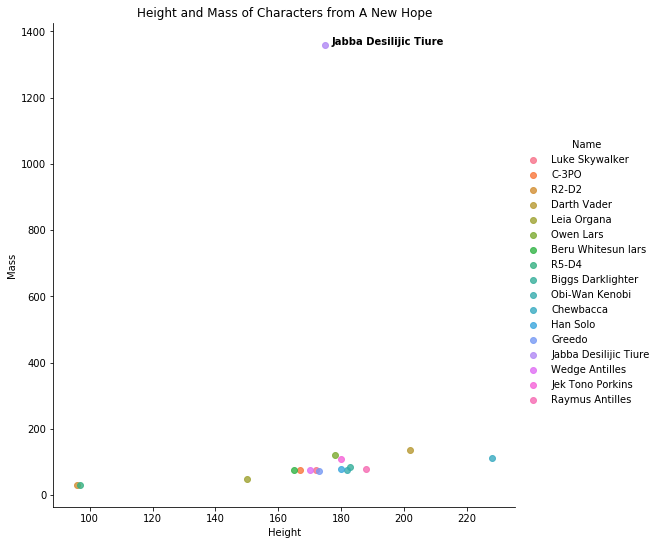

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#create list of tuples for chars
data = [(x['name'],x['mass'],x['height']) for x in characters] 
#convert data to dataframe object
df = pd.DataFrame(data).dropna(how='any')
#rename columns
df.columns = ['Name','Mass','Height'] 
#convert strings to numeric and drop nan
df['Mass'] = pd.to_numeric(df['Mass'].str.replace(",",''),errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors = 'coerce')
#drop nulls
df.dropna(inplace=True)
#reset the index
df.reset_index(inplace=True)

#plot mass against height
sns.lmplot("Height", 
           "Mass", 
           data=df, 
           hue='Name', 
           fit_reg=False,
           size=7.5) #plot Mass against Height

plt.title('Height and Mass of Characters from A New Hope')

# add annotations one by one with a loop 
for line in range(0,df.shape[0]):
    #but only label Jabba
    if "Jabba" in df.Name[line]:
        plt.text(df.Height[line]+2, 
                 df.Mass[line], 
                 df.Name[line], 
                 horizontalalignment='left', 
                 size='medium', 
                 color='black', 
                 weight='semibold')
    else:
        pass

# Postscript
1. Check out GSA's API directory here:

>https://open.gsa.gov/api


2. Join GSA's API Working group by send an email to:

>ryan.day@gsa.gov
